In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [5]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28*28,)))
model.add(layers.Dropout(0.50))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l1(0.2)))
model.add(layers.Dropout(0.30))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6

weight값을 업데이트하는데 사용되는 방법, 여기서는 rmsprop 방법 사용 <br>
비용함수는 categorical_crossentropy 사용

In [7]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [8]:
train_images.shape

(60000, 784)

input data의 형태를 3D array에서 2D array (즉, matrix) 형태로 변경

In [9]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

Input scaling

In [10]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [14]:
from tensorflow.keras import optimizers
rmsprop = optimizers.RMSprop(learning_rate=0.001)

In [15]:
model.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
# metrics => 모형의 성능을 무엇으로 평가할 것인지에 대한 것
# 'accuracy' => 전체의 관측치 중에서 몇 개 관측치의 종속변수 값을 제대로 맞혔는지를 의미

In [16]:
history = model.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 23.9462 - accuracy: 0.7893
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 4.7966 - accuracy: 0.8447
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 4.6813 - accuracy: 0.8547
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 4.6277 - accuracy: 0.8609
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 4.5790 - accuracy: 0.8655
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 4.5323 - accuracy: 0.8679
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 4.5068 - accuracy: 0.8687
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 4.4889 - accuracy: 0.8687
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 4.4683 - accuracy: 0.8692
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 4.4419 - accuracy: 0.87

fit() 함수를 통해서 학습 <br>
epochs => 전체의 학습 데이터를 몇번 사용해서 학습 할 것인지에 대한 것 <br>
epochs = 5 라는 것은 5번 사용한다는 것을 의미 <br>
batch_size 는 경사하강법에서 한번에 몇개의 data points를 사용해서 weight를 업데이트 할 것인지에 대한 것 <br>
batch_size=128 는 한번에 128개의 이미지를 사용해서 weight를 업데이트 한다는 것을 의미

In [17]:
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 4.6403 - accuracy: 0.9106


[4.640303611755371, 0.9106000065803528]

# 비용함수값 확인하기

In [18]:
import matplotlib.pyplot as plt

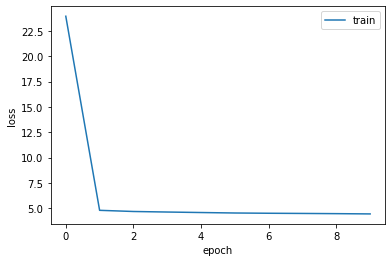

In [19]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

# Accuracy 확인하기

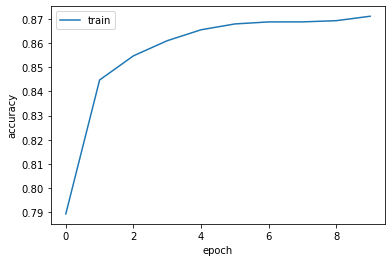

In [20]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'])
plt.show()